# COVID Epidemic analysis
Simone Richetti, mat. 129180, attività 4.

## Traccia

L’attività da svolgere consiste nel:
* Scegliere un dataset
* Usando PANDAS implementare le operazioni di data processing necessarie per mettere in correlazione i
dataset e per preparare i dati al passo successivo (join e selezioni)
* Usando pacchetti Python quali Pandas, scipy, matplotlib e sciborn implementare attività di exploratory data
analysis estraendo dati statistici e di visualizzazione dei risultati attraverso il quale sia possibile “raccontare
qualcosa sui dati” (storytelling), eventualmente partendo da dei quesiti di ricerca.

L’uso dei pacchetti non deve necessariamente essere limitato alle istruzioni viste a lezione.

### Dataset e obiettivi
Il dataset scelto è stato preso da una [challenge Kaggle](https://www.kaggle.com/roche-data-science-coalition/uncover) (cartella `ECDC/`) sulla diffusione del virus COVID-19 del mondo: esso contiene record giornalieri sul numero di nuovi casi e di morti dovuti al contagio in paesi di tutto il mondo.

Il notebook è diviso in 3 sezioni:
1. **Data Exploration**: studio delle caratteristiche del dataset e data cleaning;
2. **Data Analysis**: lo scopo è quello di studiare l'andamento del contagio e delle morti in relazione al tempo, ai continenti e alle singole nazioni;
3. **Studio dell'impatto del COVID sulla salute mentale delle persone in Italia**: unendo i dati provenienti da un altro dataset (vedi la sezione per maggiori dettagli), mettere in correlazione il l'andamento del contagio e quello delle ricerche Internet legati a disturbi mentali in Italia.

### Dipendenze

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import numpy as np
import scipy.stats as sci
import os


sns.set(style='darkgrid')

---

## Data Exploration

In [2]:
df = pd.read_csv(os.path.join('data', 'current-data-on-the-geographic-distribution-of-covid-19-cases-worldwide.csv'))
display(df)

,daterep,day,month,year,cases,deaths,countriesandterritories,geoid,countryterritorycode,popdata2018,continentexp
0,2020-05-21,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-20,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-19,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-18,18,5,2020,262,1,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-17,17,5,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
18407,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
18408,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
18409,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
18410,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


#### Columns, rows, datatypes

In [3]:
print(f'Columns: {df.columns}\n')
print(f'Datatypes: {df.dtypes}\n')
print(f'Number of rows: {df.size}\n')

Columns: Index(['daterep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesandterritories', 'geoid', 'countryterritorycode',
       'popdata2018', 'continentexp'],
      dtype='object')

Datatypes: daterep                     object
day                          int64
month                        int64
year                         int64
cases                        int64
deaths                       int64
countriesandterritories     object
geoid                       object
countryterritorycode        object
popdata2018                float64
continentexp                object
dtype: object

Number of rows: 202532



Possiamo convertire la colonna `daterep` al tipo di dato `datetime64`:

In [4]:
df['daterep'] = pd.to_datetime(df['daterep'])

#### Dati mancanti

In [5]:
null_data = df[df.isnull().any(axis=1)]
display(null_data)

,daterep,day,month,year,cases,deaths,countriesandterritories,geoid,countryterritorycode,popdata2018,continentexp
475,2020-05-21,21,5,2020,0,0,Anguilla,AI,NaN,NaN,America
476,2020-05-20,20,5,2020,0,0,Anguilla,AI,NaN,NaN,America
477,2020-05-19,19,5,2020,0,0,Anguilla,AI,NaN,NaN,America
478,2020-05-18,18,5,2020,0,0,Anguilla,AI,NaN,NaN,America
479,2020-05-17,17,5,2020,0,0,Anguilla,AI,NaN,NaN,America
...,...,...,...,...,...,...,...,...,...,...,...
18239,2020-04-30,30,4,2020,0,0,Western_Sahara,EH,NaN,NaN,Africa
18240,2020-04-29,29,4,2020,0,0,Western_Sahara,EH,NaN,NaN,Africa
18241,2020-04-28,28,4,2020,0,0,Western_Sahara,EH,NaN,NaN,Africa
18242,2020-04-27,27,4,2020,0,0,Western_Sahara,EH,NaN,NaN,Africa


Otteniamo maggiori informazioni sui dati mancanti:

In [6]:
# Which countries are involved in missing values?
null_data['countriesandterritories'].unique()

array(['Anguilla', 'Bonaire, Saint Eustatius and Saba',
       'Cases_on_an_international_conveyance_Japan', 'Eritrea',
       'Falkland_Islands_(Malvinas)', 'Namibia', 'Western_Sahara'],
      dtype=object)

In [7]:
# Which columns have null values?
df.columns[df.isnull().any()]

Index(['geoid', 'countryterritorycode', 'popdata2018'], dtype='object')

Possiamo notare come i valori mancanti siano relativi a paesi molto piccoli o particolari, per i quali probabilmente non sono disponibili tutti i dati. Per i fini della nostra analisi non sono paesi determinanti, quindi per semplicità eliminiamo i record con valori mancanti:

In [8]:
df = df.dropna()

#### Data summary e outliers

In [9]:
df.describe()

,day,month,year,cases,deaths,popdata2018
count,18039.000000,18039.000000,18039.000000,18039.000000,18039.000000,1.803900e+04
mean,15.445479,3.502023,2019.996341,274.970675,18.177116,5.150733e+07
std,8.560100,1.370084,0.060378,1712.272432,126.107845,1.756676e+08
min,1.000000,1.000000,2019.000000,-2461.000000,0.000000,1.000000e+03
25%,8.000000,3.000000,2020.000000,0.000000,0.000000,2.280102e+06
50%,15.000000,4.000000,2020.000000,2.000000,0.000000,9.630959e+06
75%,22.000000,4.000000,2020.000000,43.000000,1.000000,3.602914e+07
max,31.000000,12.000000,2020.000000,48529.000000,4928.000000,1.392730e+09


Possiamo osservare che il minimo della colonna `cases` è negativo, e che quindi sono presenti valori negativi per quella colonna nel dataset. Sono outliers oppure hanno un significato particolare, ad esempio che in quel giorno i guariti sono stati più numerosi dei nuovi casi?

In [10]:
potential_outliers = df['cases'] < 0
df[potential_outliers]

,daterep,day,month,year,cases,deaths,countriesandterritories,geoid,countryterritorycode,popdata2018,continentexp
1964,2020-05-20,20,5,2020,-209,0,Benin,BJ,BEN,11485048.0,Africa
5018,2020-05-12,12,5,2020,-50,18,Ecuador,EC,ECU,17084357.0,America
5021,2020-05-09,9,5,2020,-1480,50,Ecuador,EC,ECU,17084357.0,America
5023,2020-05-07,7,5,2020,-2461,49,Ecuador,EC,ECU,17084357.0,America
10194,2020-04-29,29,4,2020,-105,3,Lithuania,LT,LTU,2789533.0,Europe
13745,2020-05-03,3,5,2020,-161,16,Portugal,PT,PRT,10281762.0,Europe
14547,2020-05-11,11,5,2020,-9,0,San_Marino,SM,SMR,33785.0,Europe
15777,2020-04-19,19,4,2020,-713,410,Spain,ES,ESP,46723749.0,Europe
17466,2020-05-21,21,5,2020,-525,363,United_Kingdom,UK,GBR,66488991.0,Europe


Per capire meglio il senso di questi dati, possiamo osservare il loro intorno temporale, per vedere se sono in linea con quelli dei giorni adiacenti o sono discordanti con essi. Consideriamo i dati dell'Ecuador nel mese di Maggio:

In [11]:
df[(df['countriesandterritories'] == 'Ecuador') & (df['month'] == 5)]

,daterep,day,month,year,cases,deaths,countriesandterritories,geoid,countryterritorycode,popdata2018,continentexp
5009,2020-05-21,21,5,2020,703,49,Ecuador,EC,ECU,17084357.0,America
5010,2020-05-20,20,5,2020,569,40,Ecuador,EC,ECU,17084357.0,America
5011,2020-05-19,19,5,2020,400,63,Ecuador,EC,ECU,17084357.0,America
5012,2020-05-18,18,5,2020,419,48,Ecuador,EC,ECU,17084357.0,America
5013,2020-05-17,17,5,2020,1296,94,Ecuador,EC,ECU,17084357.0,America
5014,2020-05-16,16,5,2020,965,256,Ecuador,EC,ECU,17084357.0,America
5015,2020-05-15,15,5,2020,16,4,Ecuador,EC,ECU,17084357.0,America
5016,2020-05-14,14,5,2020,67,7,Ecuador,EC,ECU,17084357.0,America
5017,2020-05-13,13,5,2020,910,182,Ecuador,EC,ECU,17084357.0,America
5018,2020-05-12,12,5,2020,-50,18,Ecuador,EC,ECU,17084357.0,America


Il fatto che siano una decina righe del dataset su quasi 200k e il fatto che siano dati fortemente discordanti rispetto a quelli nel loro intorno temporale ci fanno supporre che i casi negativi siano outliers. Per non perdere le informazioni sulle morti di quei record, che invece possiamo supporre essere corrette, settiamo a 0 i nuovi casi in caso presentino un valore negativo:

In [12]:
df.loc[df[ df['cases'] < 0 ].index, 'cases'] = 0
print(df['cases'].describe())

count    18039.000000
mean       275.287377
std       1712.073985
min          0.000000
25%          0.000000
50%          2.000000
75%         43.000000
max      48529.000000
Name: cases, dtype: float64


---

## Data Analysis

### Paesi considerati

In [13]:
countries = pd.unique(df['countriesandterritories'])
print(countries.size, '\n')
print(countries)

203 

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua_and_Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia_and_Herzegovina' 'Botswana' 'Brazil' 'British_Virgin_Islands'
 'Brunei_Darussalam' 'Bulgaria' 'Burkina_Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Cape_Verde' 'Cayman_Islands'
 'Central_African_Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa_Rica' 'Cote_dIvoire' 'Croatia' 'Cuba' 'CuraÃ§ao' 'Cyprus'
 'Czechia' 'Democratic_Republic_of_the_Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican_Republic' 'Ecuador' 'Egypt' 'El_Salvador'
 'Equatorial_Guinea' 'Estonia' 'Eswatini' 'Ethiopia' 'Faroe_Islands'
 'Fiji' 'Finland' 'France' 'French_Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guam'
 'Guatemala' 'Guernsey' 'Guinea' 'Guinea_Bissau' 'Guyana' 'Ha

In [14]:
# We replace 'United_States_of_America' with 'USA', in order to have more compact plots later
df['countriesandterritories'].replace(to_replace='United_States_of_America', 
                                      value='USA', inplace=True)

### Dati globali

Partiamo da un punto di vista globale e osserviamo quanti casi di COVID19 ci sono stati nel mondo e quante morti:

In [15]:
min_date = df['daterep'].min()
max_date = df['daterep'].max()
total_cases = df['cases'].sum()
total_deaths = df['deaths'].sum()
print(' '*3 + 'COVID SUMMARY\n' + '='*19)
print(f'Time period: {min_date} - {max_date}\n')
print(f'Total cases in the world: {total_cases}')
print(f'Total deaths in the world: {total_deaths}')

   COVID SUMMARY
Time period: 2019-12-31 00:00:00 - 2020-05-21 00:00:00

Total cases in the world: 4965909
Total deaths in the world: 327897


Osserviamo l'andamento globale del COVID nel mondo con l'avanzare del tempo:

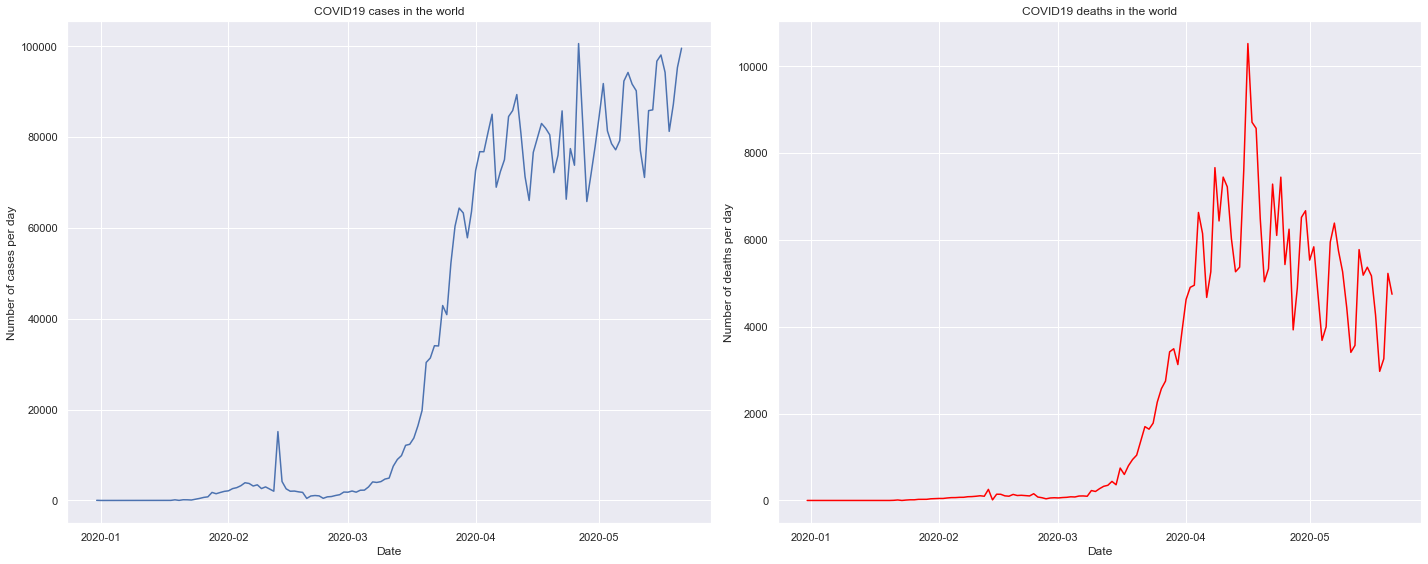

In [16]:
# Create a dataframe which reports the number of cases in the world for each day
world_agg = df[['daterep', 'cases', 'deaths']].groupby('daterep', 
                                                       as_index=False).sum()
world_agg.sort_values(by='daterep')

# Setup subplots
dims = (20, 8)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=dims)
ax1.set_title("COVID19 cases in the world")
ax2.set_title("COVID19 deaths in the world")
ax1.set_xlabel('Date')
ax2.set_xlabel('Date')
ax1.set_ylabel('Number of cases per day')
ax2.set_ylabel('Number of deaths per day')

ax1.plot(world_agg['daterep'], world_agg['cases'])
ax2.plot(world_agg['daterep'], world_agg['deaths'], color='red')
plt.tight_layout()
plt.show()

Osserviamo ora quali siano stati i continenti più colpiti ad oggi:

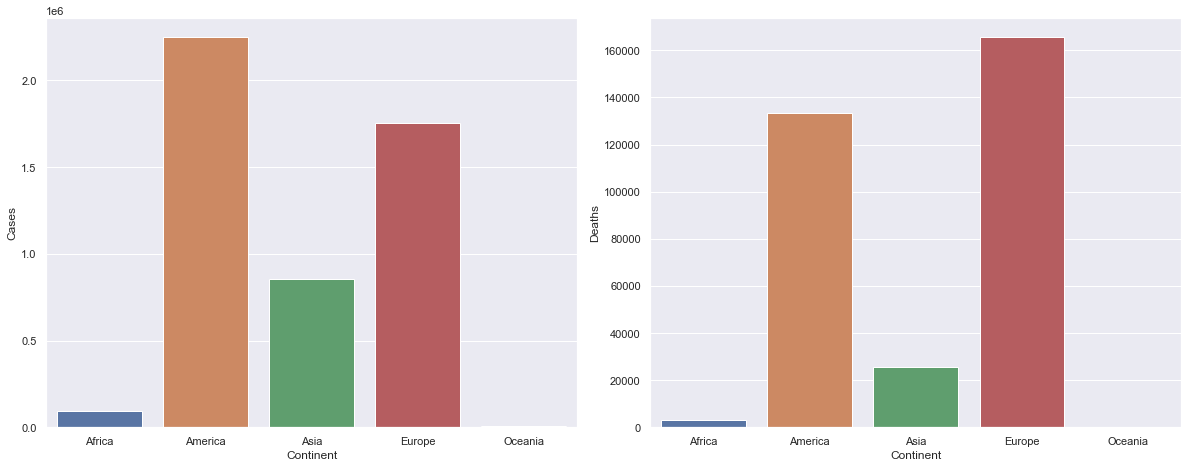

In [17]:
# DataFrame con casi e morti totali per continenti
cont_count = df[['continentexp', 'cases', 'deaths']].groupby('continentexp', 
                                                             as_index=False).sum()
# cont_count.rename({'continentexp': 'Continente', 'cases': 'Casi', 'deaths': 'Morti'}, inplace=True)

f, axes = plt.subplots(1,2, figsize=[dim * 5 / 6 for dim in dims])
ax1 = sns.barplot(x='continentexp', y='cases', data=cont_count, ax=axes[0])
ax2 = sns.barplot(x='continentexp', y='deaths', data=cont_count, ax=axes[1])
ax1.set(xlabel='Continent', ylabel='Cases')
ax2.set(xlabel='Continent', ylabel='Deaths')
plt.tight_layout()
plt.show()

Come si può osservare, in America ci sono stati più casi ma in Europa un numero maggiore di morti. Sudiamo come si è evoluto il contagio nei due continenti durante il tempo con una heatmap:

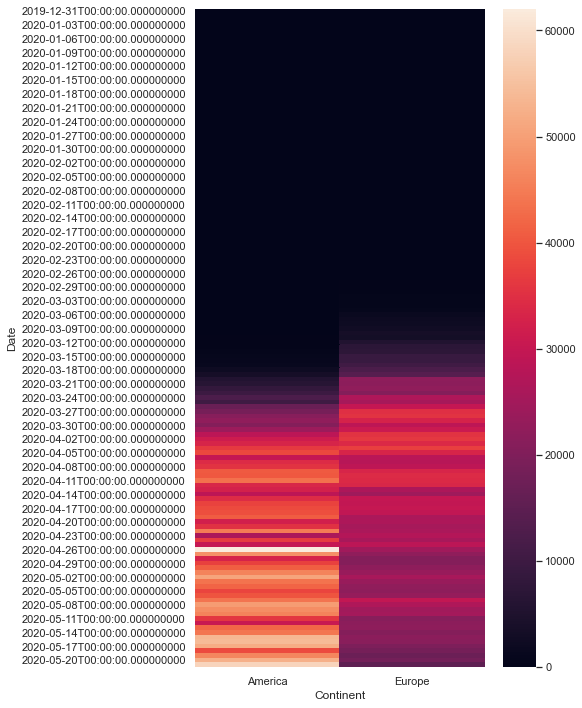

In [18]:
subset = df[(df['continentexp'] == 'America')|(df['continentexp'] == 'Europe')]
subset = subset[['continentexp', 'daterep', 'cases']]
subset = subset.groupby(by=['continentexp', 'daterep'], 
                        as_index=False).cases.sum()

plt.figure(figsize=(8, 10))
subset = subset.pivot_table(index='daterep', columns='continentexp', 
                            values='cases')
ax = sns.heatmap(data=subset)
ax.set(xlabel='Continent', ylabel='Date')
plt.tight_layout()
plt.show()

Si può osservare come il contagio in America sia iniziato più di una settimana dopo rispetto all'Europa. Nonostante abbia raggiunto picchi più alti, probabilmente il fatto che sia iniziato dopo ha permesso di reagire in maniera più pronta al virus.

Inoltre, sarebbe significativo rapportare queste informazioni alla popolosità di ciascun continente, in modo avere una visione più precisa dell'incisività della malattia nei due continenti:

In [19]:
cont_pop_df = df[['continentexp', 'popdata2018', 'countryterritorycode', 'cases', 'deaths']].drop_duplicates()
cont_pop_df = cont_pop_df.groupby(by='continentexp', as_index=False).sum()

cont_pop_df['cases-pop-ratio'] = cont_pop_df['cases'] / cont_pop_df['popdata2018']
cont_pop_df['deaths-pop-ratio'] = cont_pop_df['deaths'] / cont_pop_df['popdata2018']
display(cont_pop_df)

,continentexp,popdata2018,cases,deaths,cases-pop-ratio,deaths-pop-ratio
0,Africa,5.221103e+10,91278,2943,0.000002,5.636740e-08
1,America,7.468723e+10,2246394,133371,0.000030,1.785727e-06
2,Asia,3.660826e+11,851157,25733,0.000002,7.029288e-08
3,Europe,6.008618e+10,1751451,165436,0.000029,2.753312e-06
4,Oceania,1.995811e+09,7970,117,0.000004,5.862278e-08


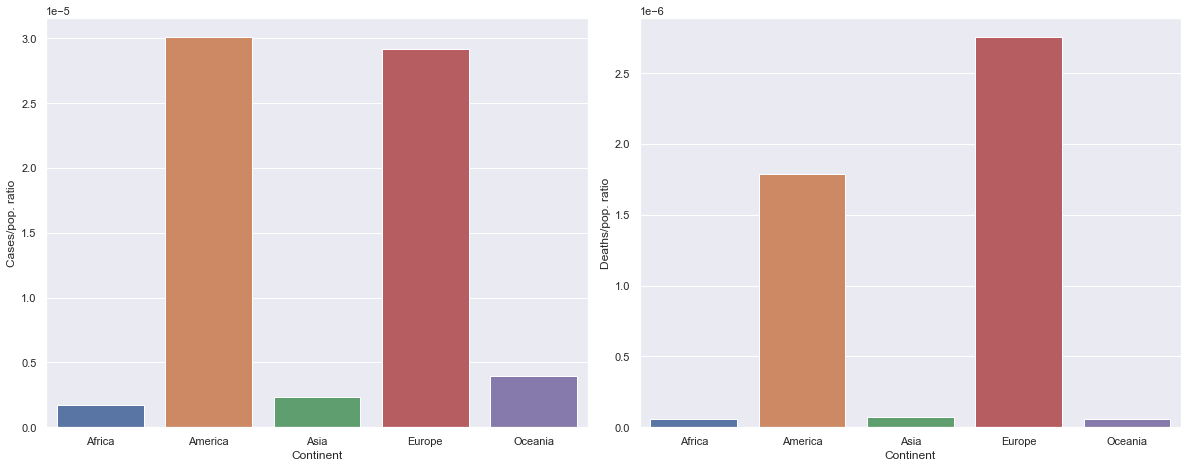

In [20]:
f, axes = plt.subplots(1,2, figsize=[dim * 5 / 6 for dim in dims])
ax1 = sns.barplot(x='continentexp', y='cases-pop-ratio', 
                  data=cont_pop_df, ax=axes[0])
ax2 = sns.barplot(x='continentexp', y='deaths-pop-ratio', 
                  data=cont_pop_df, ax=axes[1])
ax1.set(xlabel='Continent', ylabel='Cases/pop. ratio')
ax2.set(xlabel='Continent', ylabel='Deaths/pop. ratio')
plt.tight_layout()
plt.show()

Rapportando i casi e le morti alla popolazione dei continenti diventa evidente come l'evoluzione del contagio sia simile tra Europa e America ma come l'incisività nel primo in termini di morti sia stata maggiore.

### Informazioni sui paesi

##### Paesi più colpiti, in termini assoluti e in rapporto alla popolazione:

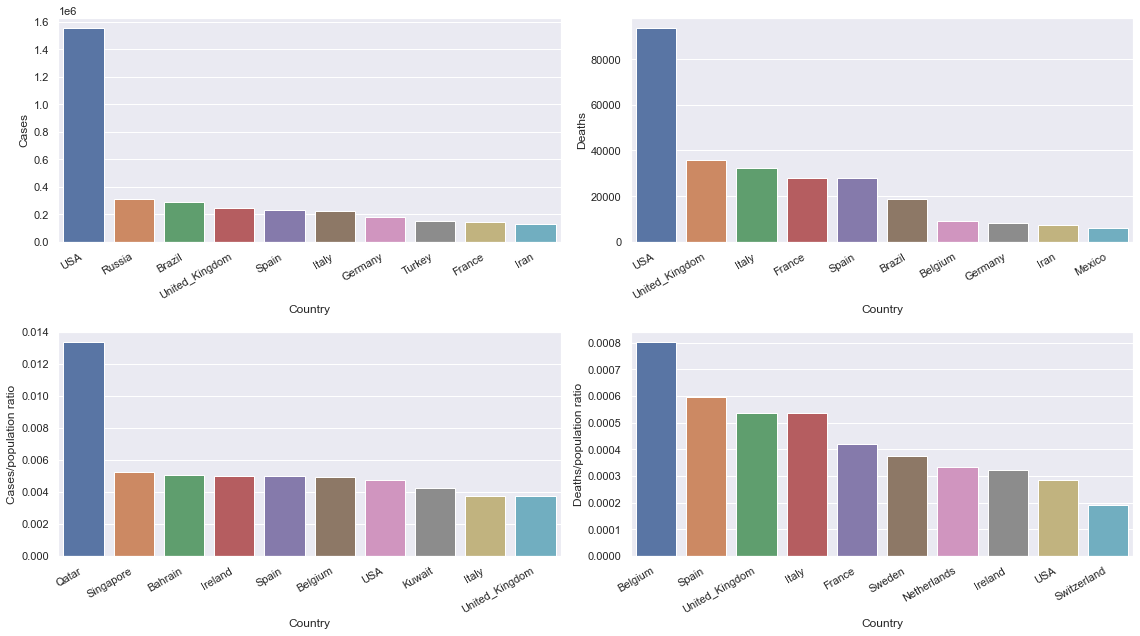

In [21]:
country_df = df[['countriesandterritories', 'cases', 'deaths', 'popdata2018']].copy()
abs_data_df = country_df.drop(columns='popdata2018').groupby('countriesandterritories',as_index=False).sum()

# Extract the 6 countries with the highest number of cases for a later plot
most_cases_countries = abs_data_df.sort_values(by='cases', ascending=False).head(6)['countriesandterritories'].values

# Absolute number of cases (top-left)
sixnin = (16,9)
_, axes = plt.subplots(2, 2, figsize=sixnin)
ax1 = sns.barplot(
    x='countriesandterritories', 
    y='cases', 
    data=abs_data_df.sort_values(by='cases', ascending=False).head(10), 
    ax=axes[0, 0])
ax1.set(ylabel='Cases')

# Absolute number of deaths (top-right)
ax2 = sns.barplot(
    x='countriesandterritories', 
    y='deaths', 
    data=abs_data_df.sort_values(by='deaths', ascending=False).head(10), 
    ax=axes[0, 1])
ax2.set(ylabel='Deaths')

# Compute cases/pop and deaths/pop ratio for each country. We choose only 
# countries with a populoation greater than 1M because little countries tend to
# have a very high ratio
country_df = country_df[ country_df['popdata2018'] >= 1000000 ] 
country_df['cases-pop-ratio'] = country_df['cases'] / country_df['popdata2018']
country_df['deaths-pop-ratio'] = country_df['deaths'] / country_df['popdata2018']
ratio_data_df = country_df.drop(columns=['popdata2018', 'cases', 'deaths']).groupby('countriesandterritories',as_index=False).sum()

# Cases/population ratio (bottom-left)
ax3 = sns.barplot(
    x='countriesandterritories', 
    y='cases-pop-ratio', 
    data=ratio_data_df.sort_values(by='cases-pop-ratio', ascending=False).head(10),
    ax=axes[1, 0])
ax3.set(ylabel='Cases/population ratio')

# Deaths/population ratio (bottom-left)
ax4 = sns.barplot(
    x='countriesandterritories', 
    y='deaths-pop-ratio', 
    data=ratio_data_df.sort_values(by='deaths-pop-ratio', ascending=False).head(10),
    ax=axes[1, 1])
ax4.set(ylabel='Deaths/population ratio')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set(xlabel='Country')
plt.tight_layout()
plt.show()

##### Andamento della malattia per paese nel tempo:

In [22]:
print(f'Countries with the highest number of cases: {most_cases_countries}')

Countries with the highest number of cases: ['USA' 'Russia' 'Brazil' 'United_Kingdom' 'Spain' 'Italy']


Osserviamo che la Cina non è tra i dieci paesi per numero di casi più alto, ma è comunque interessante osservare l'andamento temporale del contagio in Cina rispetto alle altre nazioni. La aggiungiamo, quindi, alla lista dei paesi che vogliamo visualizzare:

In [23]:
most_cases_countries = np.append(most_cases_countries, 'China')

In [24]:
# Build the desired view for the plot: date and cases for the selected countries
country_view = df[ df['countriesandterritories'].isin(most_cases_countries) ]
country_view = country_view[['daterep', 'cases', 'countriesandterritories']]
display(country_view)

,daterep,cases,countriesandterritories
2402,2020-05-21,19951,Brazil
2403,2020-05-20,17408,Brazil
2404,2020-05-19,13140,Brazil
2405,2020-05-18,7938,Brazil
2406,2020-05-17,14919,Brazil
...,...,...,...
17813,2020-01-04,0,USA
17814,2020-01-03,0,USA
17815,2020-01-02,0,USA
17816,2020-01-01,0,USA


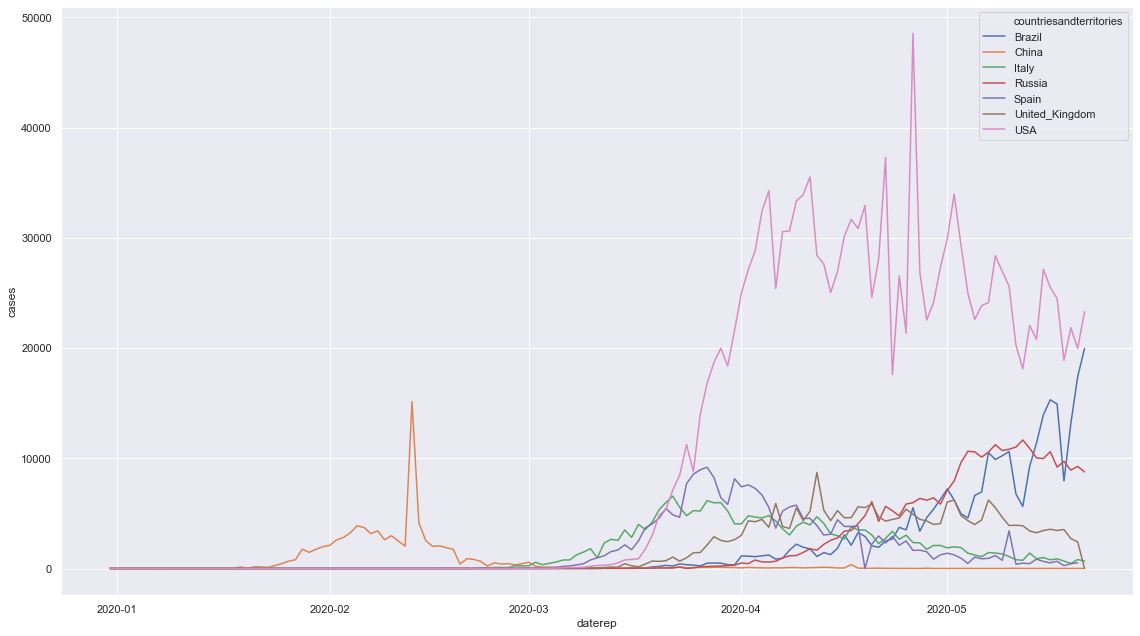

In [25]:
fig, ax = plt.subplots(figsize=sixnin)
sns.lineplot(x='daterep', y='cases', hue='countriesandterritories', 
             data=country_view, ax=ax);
plt.tight_layout()
plt.show()

Possiamo osservare come il contagio in Cina sia iniziato molto prima che in tutto il resto del mondo: a seguire è arrivato nell'Europa continentale (Spagna e Italia nel grafico), quindi negli USA in cui, anche a causa dell'alta popolosità, ha raggiunto livelli maggiori che in qualsiasi altro paese. Tra gli ultimi paesi vittime del contagio possiamo osservare Russia e Brasile, in cui il contagio non si è ancora arrestato.

---

## Impatto del COVID sulla salute mentale delle persone in Italia

In questa terza ed ultima sezione, sfruttiamo i dati appena utilizzati unitamente a quelli di un altro dataset Kaggle, [COVID-19 and Mental Health Search Terms](https://www.kaggle.com/luckybro/mental-health-search-term) (`search-term-italy.xlsx`). Quest'ultimo dataset contiene informazioni sulla frequenza delle ricerche di termini legati a patologie e disturbi mentali in un periodo di tempo che va da Giugno 2019 a fine Maggio 2020. I dati sono relativi all'Italia.

Riporto la descrizione del dataset:

>The mental health related search terms are "mental health", "depression", "anxiety", "ocd", "obsessive compulsive disorder", "insomnia", "panic attack", "counseling", "psychiatrist".
>
>Search interest is indicated by a number between 0 and 100, where 100 means the most popular point of time(by week), 1 means the least, and 0 no enough data.
>
>All data is collected from Google Trends. I assumed, when searching the terms, users from countries other than English-speaking performed the search in their own language, and they typed the word correctly.

Lo scopo della nostra analisi è quello di riuscire ad incrociare le informazioni dei due dataset per cercare informazioni sulla correlazione tra la ricerca di questi termini e l'andamento del contagio.

In [26]:
mh_df = pd.read_csv(os.path.join('data', 'search_term_italy.csv'), delimiter=';')
display(mh_df.head())
display(mh_df.tail())

,Week,depression,anxiety,obsessive compulsive disorder,ocd,insomnia,panic attack,mental health,counseling,psychiatrist
0,16/06/2019,92,75,47,20,68,60,60,52,90
1,23/06/2019,81,75,49,22,58,69,44,50,73
2,30/06/2019,84,68,49,17,53,65,45,62,88
3,07/07/2019,85,67,46,26,56,69,52,58,95
4,14/07/2019,91,69,95,24,65,76,48,61,79


,Week,depression,anxiety,obsessive compulsive disorder,ocd,insomnia,panic attack,mental health,counseling,psychiatrist
46,03/05/2020,83,89,38,34,84,55,44,43,80
47,10/05/2020,82,86,74,91,61,72,51,53,71
48,17/05/2020,96,83,38,93,86,56,66,43,96
49,24/05/2020,89,91,39,83,68,57,49,52,88
50,31/05/2020,93,91,39,100,61,64,40,54,87


In [27]:
display(mh_df.describe())

,depression,anxiety,obsessive compulsive disorder,ocd,insomnia,panic attack,mental health,counseling,psychiatrist
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000,51.000000
mean,84.000000,79.411765,34.078431,29.490196,68.058824,69.00000,47.019608,61.058824,78.666667
std,10.369185,9.018152,25.837835,20.965088,12.761523,11.44028,11.229408,15.537583,12.804166
min,53.000000,65.000000,0.000000,13.000000,47.000000,46.00000,29.000000,32.000000,51.000000
25%,81.000000,72.000000,0.000000,20.000000,58.000000,62.00000,40.000000,52.000000,69.500000
50%,86.000000,77.000000,41.000000,22.000000,66.000000,68.00000,46.000000,60.000000,81.000000
75%,91.000000,87.500000,45.500000,26.000000,72.000000,75.00000,51.000000,70.500000,88.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000


Osserviamo dal riassunto di Pandas che i dati sono coerenti: nessun valore mancante, nessun valore negativo, tutti i campi contengono valori che vanno da 0 a 100. Il range temporale coperto dai dataset è il seguente:

In [28]:
mh_df['Week'] = pd.to_datetime(mh_df['Week'], format='%d/%m/%Y')
first_week = mh_df['Week'].min()
last_week = mh_df['Week'].max()
print(f'COVID dataset time range: {min_date} - {max_date}\n')
print(f'Mental health dataset time range: {first_week}-{last_week}')

COVID dataset time range: 2019-12-31 00:00:00 - 2020-05-21 00:00:00

Mental health dataset time range: 2019-06-16 00:00:00-2020-05-31 00:00:00


Preso nota del formato dei dati e del periodo di tempo coperto, il *workflow* che si intende mettere in pratica è il seguente:
1. Filtrare dataset COVID considerando solo casi in Italia
2. Raggruppare i dati del contagio in settimane
3. Effettuare join tra dataset
4. Calcolare correlazione tra COVID e ricerche

### Data Preparation

Filtro dataset COVID considerando solo casi in Italia:

In [29]:
italy_view = \
    df[ df['countriesandterritories'] == 'Italy' ].sort_values(by='daterep')
italy_view = italy_view[['daterep', 'cases', 'deaths']]
display(italy_view)

,daterep,cases,deaths
8941,2019-12-31,0,0
8940,2020-01-01,0,0
8939,2020-01-02,0,0
8938,2020-01-03,0,0
8937,2020-01-04,0,0
...,...,...,...
8803,2020-05-17,875,153
8802,2020-05-18,675,145
8801,2020-05-19,451,99
8800,2020-05-20,813,162


Raggruppo i dati del contagio in settimane:

In [30]:
italy_week_view = italy_view.groupby(pd.Grouper(key='daterep', freq='W')).sum()
display(italy_week_view)

,cases,deaths
daterep,,
2020-01-05,0,0
2020-01-12,0,0
2020-01-19,0,0
2020-01-26,0,0
2020-02-02,3,0
2020-02-09,0,0
2020-02-16,0,0
2020-02-23,76,2
2020-03-01,1049,27


Join tra i due dataset basato sulla *week* dei record:

In [31]:
# In order to perform a join, week has to be the index in the mental health 
# dataset:
mh_df = mh_df.set_index('Week')

agg_df = mh_df.join(italy_week_view)
display(agg_df.head(), agg_df.tail())

,depression,anxiety,obsessive compulsive disorder,ocd,insomnia,panic attack,mental health,counseling,psychiatrist,cases,deaths
Week,,,,,,,,,,,
2019-06-16,92,75,47,20,68,60,60,52,90,NaN,NaN
2019-06-23,81,75,49,22,58,69,44,50,73,NaN,NaN
2019-06-30,84,68,49,17,53,65,45,62,88,NaN,NaN
2019-07-07,85,67,46,26,56,69,52,58,95,NaN,NaN
2019-07-14,91,69,95,24,65,76,48,61,79,NaN,NaN


,depression,anxiety,obsessive compulsive disorder,ocd,insomnia,panic attack,mental health,counseling,psychiatrist,cases,deaths
Week,,,,,,,,,,,
2020-05-03,83,89,38,34,84,55,44,43,80,13977.0,2326.0
2020-05-10,82,86,74,91,61,72,51,53,71,8940.0,1685.0
2020-05-17,96,83,38,93,86,56,66,43,96,6492.0,1368.0
2020-05-24,89,91,39,83,68,57,49,52,88,2604.0,567.0
2020-05-31,93,91,39,100,61,64,40,54,87,NaN,NaN


Eliminiamo l'ultimo record poichè non abbiamo informazioni sui contagi in quel periodo e sostituiamo i NaN presenti con 0 poichè, appunto, si riferiscono a periodi in cui il COVID non era ancora presente in Italia.

In [32]:
agg_df.drop(agg_df.tail(1).index,inplace=True)
# The mental health dataset considers a wider timnescale then the COVID dataset.
# It is better to remove some of the first rows to avoid the influence of past 
# events: this would invalidate our correlation measure
agg_df.drop(agg_df.head(20).index,inplace=True)
agg_df.fillna(0, inplace=True)
display(agg_df.head(), agg_df.tail())

,depression,anxiety,obsessive compulsive disorder,ocd,insomnia,panic attack,mental health,counseling,psychiatrist,cases,deaths
Week,,,,,,,,,,,
2019-11-03,81,73,42,26,64,68,53,80,89,0.0,0.0
2019-11-10,88,69,43,23,63,75,58,72,83,0.0,0.0
2019-11-17,81,76,43,26,67,65,49,90,95,0.0,0.0
2019-11-24,84,77,42,19,69,70,50,100,80,0.0,0.0
2019-12-01,87,65,0,41,57,56,50,88,78,0.0,0.0


,depression,anxiety,obsessive compulsive disorder,ocd,insomnia,panic attack,mental health,counseling,psychiatrist,cases,deaths
Week,,,,,,,,,,,
2020-04-26,83,91,37,41,81,73,35,58,69,19426.0,3157.0
2020-05-03,83,89,38,34,84,55,44,43,80,13977.0,2326.0
2020-05-10,82,86,74,91,61,72,51,53,71,8940.0,1685.0
2020-05-17,96,83,38,93,86,56,66,43,96,6492.0,1368.0
2020-05-24,89,91,39,83,68,57,49,52,88,2604.0,567.0


### Data Analysis: studio delle correlazioni

Osserviamo il valore della Pearson's Correlation tra le colonne del nostro DataFrame. Ricordiamo che la Pearson's Correlation è calcolata come:
$$cor(x,y) = \frac{cov(x,y)}{sd(x)sd(y)}$$
dove $cov$ indica la covarianza tra le due variabili e $sd$ la deviazione standard della singola variabile. Essa è un valore sempre compreso tra $[-1,1]$, dove gli estremi rappresentano una correlazione perfetta, il segno rappresenta se sia una correlazione diretta o inversa e lo $0$ rappresenta una totale assenza di correlazione:

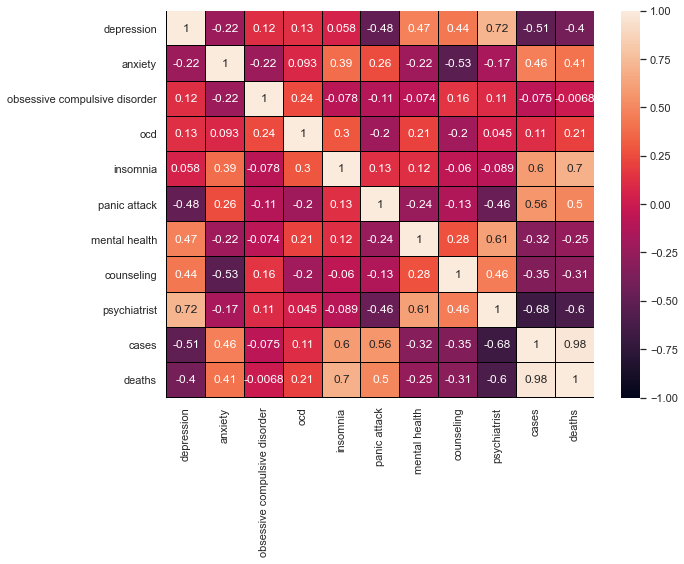

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data=agg_df.corr(), linewidths=.01, linecolor='black', ax=ax, 
            annot=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

Dalla *heatmap* si può osservare che:
* "Ansia", "insonnia" e "attacchi di panico" sono ricerche positivamente e moderatamente correlate al numero di casi e di morti legati al COVID-19;
* La ricerca di psichiatri è negativamente correlata al contagio in maniera forte, probabilmente perchè durante le misure di lockdown non era possibile goderne dei servizi;
* Le ricerche legate ai disturbi ossessivo-compulsivi sono quasi totalmente scorrelate al contagio. Questo è ragionevole, poichè non è un problema mentale le cui cause sono direttamente riconducibili al fenomeno del contagio. Lo stesso vale per le ricerche "salute mentale" e "consulenza", probabilmente perchè sono termini di ricerca molto vaghi;
* Stranamente, la depressione è correlata negativamente al fenomeno del COVID, quando ci si potrebbe aspettare il contrario. Questo potrebbe essere legato al fatto che è un termine ampiamente utilizzato e molto spesso abusato nel linguaggio comune, per cui il numero di ricerche anche nel periodo precedente al COVID doveva essere sicuramente molto alto, risultando quindi in una correlazione negativa.

Proviamo ad approfondire le correlazioni tra COVID e depressione ed ansia, mediante degli *scatter plot* e osservando l'andamento delle ricerche nel tempo:

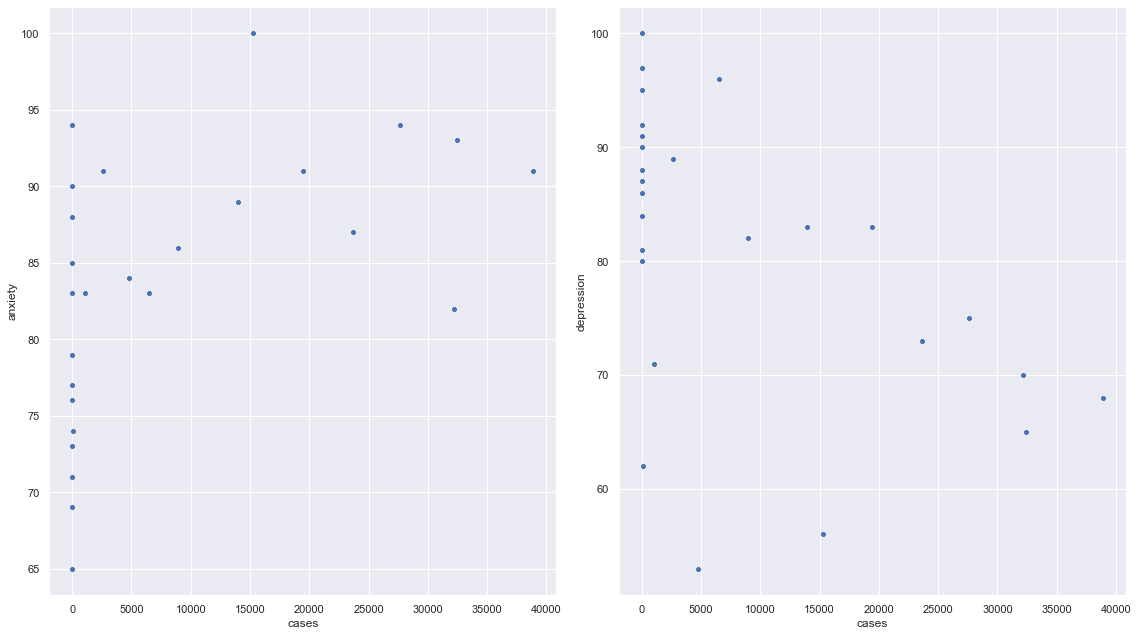

In [34]:
fig, axes = plt.subplots(1,2, figsize=sixnin)
sns.scatterplot(x='cases', y='anxiety', data=agg_df, ax=axes[0])
sns.scatterplot(x='cases', y='depression', data=agg_df, ax=axes[1])
plt.tight_layout()
plt.show()

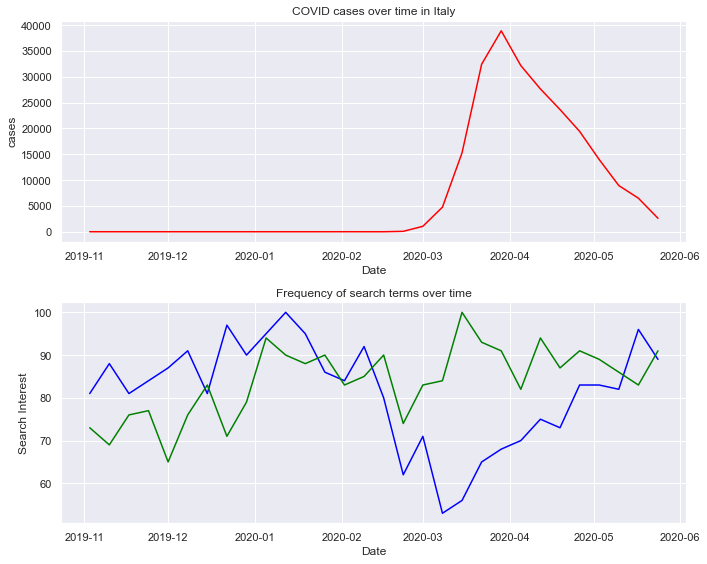

In [35]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))

ax1.set_title('COVID cases over time in Italy')
ax1.set(xlabel='Date', ylabel='cases')
ax1.plot(agg_df.index, agg_df['cases'], color='red')

ax2.set_title('Frequency of search terms over time')
ax2.set(xlabel='Date', ylabel='Search Interest')
ax2.plot(agg_df.index, agg_df['depression'], color='blue')
ax2.plot(agg_df.index, agg_df['anxiety'], color='green')
plt.tight_layout()
plt.show()

I plot ci mostrano che:
* Entrambi i termini erano molto ricercati anche prima del COVID;
* Entrambi i termini aveano un andamente molto oscillatorio nella frequenza delle ricerche prima del COVID, probaiblmente questo è il motivo per cui il valore della Pearson Correlation non supera mai il +0.6/-0.6;
* Il termine di ricerca legato all'ansia ha un picco precedente al contagio, ma dopo di esso la frequenza delle sue ricerche segue in maniera abbastanza precisa l'andamento dei contagi;
* L'interesse legato al termine di ricerca "depressione" era molto alto prima del contagio, ad un certo punto ha iniziato a decrescere e l'inizio dell'epidemia lo ha portato a crescere nuovamente. La correlazione negativa potrebbe essere dovuta al fatto che all'inizio del contagio il termine di ricerca era molto meno frequente rispetto ai mesi precedenti.

Per concludere la trattazione, utilizziamo la libreria `scipy` per calcolare anche altre misure di correlazione e i *p-value* legati ai coefficienti di correlazione, cercando di assicurarci che abbiano un valore basso, segno di una relazione significativa tra i nostri dati:


In [36]:
corr, p = sci.pearsonr(agg_df['cases'], agg_df['depression'])
print(f'Pearson correlation: {corr:.3f}\n\t p-value: {p:.4f}')

corr, p = sci.spearmanr(agg_df['cases'], agg_df['depression'])
print(f'Spearman correlation: {corr:.3f}\n\t p-value: {p:.4f}')

corr, p = sci.kendalltau(agg_df['cases'], agg_df['depression'])
print(f'Kendall correlation: {corr:.3f}\n\t p-value: {p:.4f}')

Pearson correlation: -0.506
	 p-value: 0.0043
Spearman correlation: -0.609
	 p-value: 0.0004
Kendall correlation: -0.457
	 p-value: 0.0010
